In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Version 2 (with LinCKA2)

In [5]:
# loading the data
gauss_trans = np.load('two_cubes_exp_lincka2_means_0_1.1_10seeds_v2.npy')
gauss_inv_lin = np.load('inv_lin_cka_fig_data_lincka2_10k_cubes_means0_1.1.npy')

rbf1 = np.load('two_cubes_exp_median_rbfcka2__means_0_1.1_10seeds_v2.npy')
rbf05= np.load('two_cubes_exp_median0.5_rbfcka2__means_0_1.1_10seeds_v2.npy')
rbf02= np.load('two_cubes_exp_median0.2_rbfcka2__means_0_1.1_10seeds_v2.npy')

cifar_classes = np.load('cifar10_translation_data_lincka2_layer-1.npy')
cifar_points = np.load('cifar10_one_pt_translation_data_lincka2_layer-1.npy')

# data pre-processing
gauss_trans_means = np.mean(gauss_trans, axis = 0)
gauss_trans_stds = np.std(gauss_trans, axis = 0)

rbf1_means = np.mean(rbf1, axis = 0)
rbf1_stds = np.std(rbf1, axis = 0)
rbf05_means = np.mean(rbf05, axis = 0)
rbf05_stds = np.std(rbf05, axis = 0)
rbf02_means = np.mean(rbf02, axis = 0)
rbf02_stds = np.std(rbf02, axis = 0)
rbf01_means = np.mean(rbf01, axis = 0)
rbf01_stds = np.std(rbf01, axis = 0)

gauss_inv_lin_means =  np.mean(gauss_inv_lin, axis = 0)[:-2,:-2]

cifar_classes_means_ = np.mean(cifar_classes, axis = 1)[1:]
cifar_classes_means = np.mean(cifar_classes_means_, axis=0)[0:10,1]
cifar_classes_stds = np.std(cifar_classes_means_, axis=0)[0:10,1]

cifar_outlier_means = np.mean(cifar_points, axis = 0)[:10,1]
cifar_outlier_stds = np.std(cifar_points, axis = 0)[:10,1]

In [6]:
gauss_inv_lin_means

array([[0.09114311, 0.61579063, 0.70776669, 0.71550897, 0.71567443,
        0.71567596, 0.71567054, 0.71566986, 0.71566936],
       [0.04752932, 0.09114311, 0.21943082, 0.61579062, 0.70776669,
        0.7152254 , 0.71567597, 0.71567259, 0.71566986],
       [0.04615579, 0.05712641, 0.09114311, 0.30322316, 0.61579062,
        0.70776669, 0.71567444, 0.71567597, 0.71567052],
       [0.04577058, 0.04752932, 0.05301649, 0.09114311, 0.21943081,
        0.52980326, 0.71522539, 0.71566224, 0.71567262],
       [0.04571533, 0.04615579, 0.04752932, 0.05712641, 0.09114311,
        0.21943081, 0.7077667 , 0.71522539, 0.71567597],
       [0.04570142, 0.04581192, 0.04615579, 0.04855883, 0.05712641,
        0.09114311, 0.61579062, 0.7077667 , 0.71567442],
       [0.04569688, 0.04570142, 0.04571533, 0.04581192, 0.04615579,
        0.04752932, 0.09114311, 0.21943081, 0.70776671],
       [0.04569672, 0.0456979 , 0.04570142, 0.04572571, 0.04581192,
        0.04615579, 0.05712641, 0.09114311, 0.61579061],


In [7]:
gauss_trans_dist_list = c_list = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
mu_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000]#, 1e4, 1e5]
sigma_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000]#, 1e4, 1e5]
mu_list_labels = ['1', '5', '10', '25', '50', '100', '500', '1e3', '5e3']#, '1e4', '1e5']
sigma_list_labels = ['1', '5', '10', '25', '50', '100', '500', '1e3', '5e3']#, '1e4', '1e5']

cifar_distances = [1, 5, 10, 25, 50, 100, 500, 1000, 2500, 5000]#, 7500, 1e4, 1.5e4, 2e4]

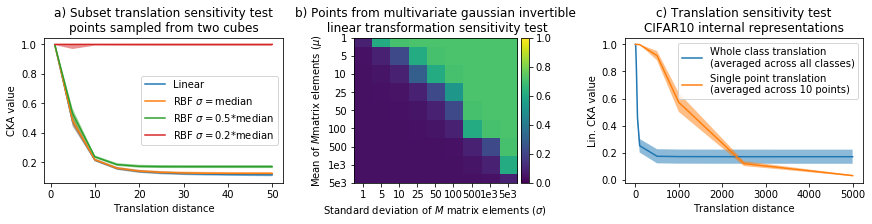

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,3, figsize=(12,3), constrained_layout=True)

# gauss translation
ax[0].plot(gauss_trans_dist_list, gauss_trans_means, label = 'Linear')
ax[0].fill_between(gauss_trans_dist_list, gauss_trans_means-10*gauss_trans_stds, gauss_trans_means+10*gauss_trans_stds, alpha = 0.5)
ax[0].plot(gauss_trans_dist_list, rbf1_means, label = r'RBF $\sigma=$median')
ax[0].fill_between(gauss_trans_dist_list, rbf1_means-10*rbf1_stds, rbf1_means+10*rbf1_stds, alpha = 0.5)

ax[0].plot(gauss_trans_dist_list, rbf05_means, label = r'RBF $\sigma=$0.5*median')
ax[0].fill_between(gauss_trans_dist_list, rbf05_means-10*rbf1_stds, rbf05_means+10*rbf05_stds, alpha = 0.5)
ax[0].plot(gauss_trans_dist_list, rbf02_means, label = r'RBF $\sigma=$0.2*median')
ax[0].fill_between(gauss_trans_dist_list, rbf02_means-10*rbf1_stds, rbf02_means+10*rbf02_stds, alpha = 0.5)

ax[0].set_xlabel('Translation distance')
ax[0].set_ylabel('CKA value')
ax[0].set_title('a) Subset translation sensitivity test\npoints sampled from two cubes')
ax[0].legend()

# gauss inv_lin
im = ax[1].imshow(gauss_inv_lin_means, interpolation ='nearest', vmin=0, vmax=1)
ax[1].set_xticks(np.arange(len(sigma_list)))
ax[1].set_yticks(np.arange(len(mu_list)))
ax[1].set_xticklabels(sigma_list_labels)
ax[1].set_yticklabels(mu_list_labels)

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(im, cax = cax)
ax[1].set_title('b) Points from multivariate gaussian invertible\n linear transformation sensitivity test')
ax[1].set_xlabel(r'Standard deviation of $M$'+r' matrix elements ($\sigma$)')
ax[1].set_ylabel(r'Mean of $M$'+r'matrix elements ($\mu$)')

# CIFAR10 all classes and outliers
ax[2].plot(cifar_distances, cifar_classes_means, label = 'Whole class translation\n(averaged across all classes)')
ax[2].fill_between(cifar_distances, cifar_classes_means-cifar_classes_stds, cifar_classes_means+cifar_classes_stds, alpha = 0.5)

ax[2].plot(cifar_distances, cifar_outlier_means, label = 'Single point translation\n(averaged across 10 points)')
ax[2].fill_between(cifar_distances, cifar_outlier_means-cifar_outlier_stds, cifar_outlier_means+cifar_outlier_stds, alpha = 0.5)
ax[2].legend()
ax[2].set_xlabel('Translation distance')
ax[2].set_ylabel('Lin. CKA value')
ax[2].set_title('c) Translation sensitivity test\nCIFAR10 internal representations')

plt.savefig('figures/neurips_sensitivity_tests_lincka2.png')